In [19]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

conn = pymysql.connect(host='localhost', user='root', password='1234', db='sqlclass_db', charset='utf8')

cur=conn.cursor(pymysql.cursors.DictCursor)

cur.execute('select*from dagu_shut_down')
rows1=cur.fetchall()

querry='''
select*from dague_total

'''
cur.execute(querry)
rows2=cur.fetchall()
dagudf=pd.DataFrame(rows1)
dagutdf=pd.DataFrame(rows2)



daguediv=(dagudf/dagutdf)*100

cur.close()
conn.close()


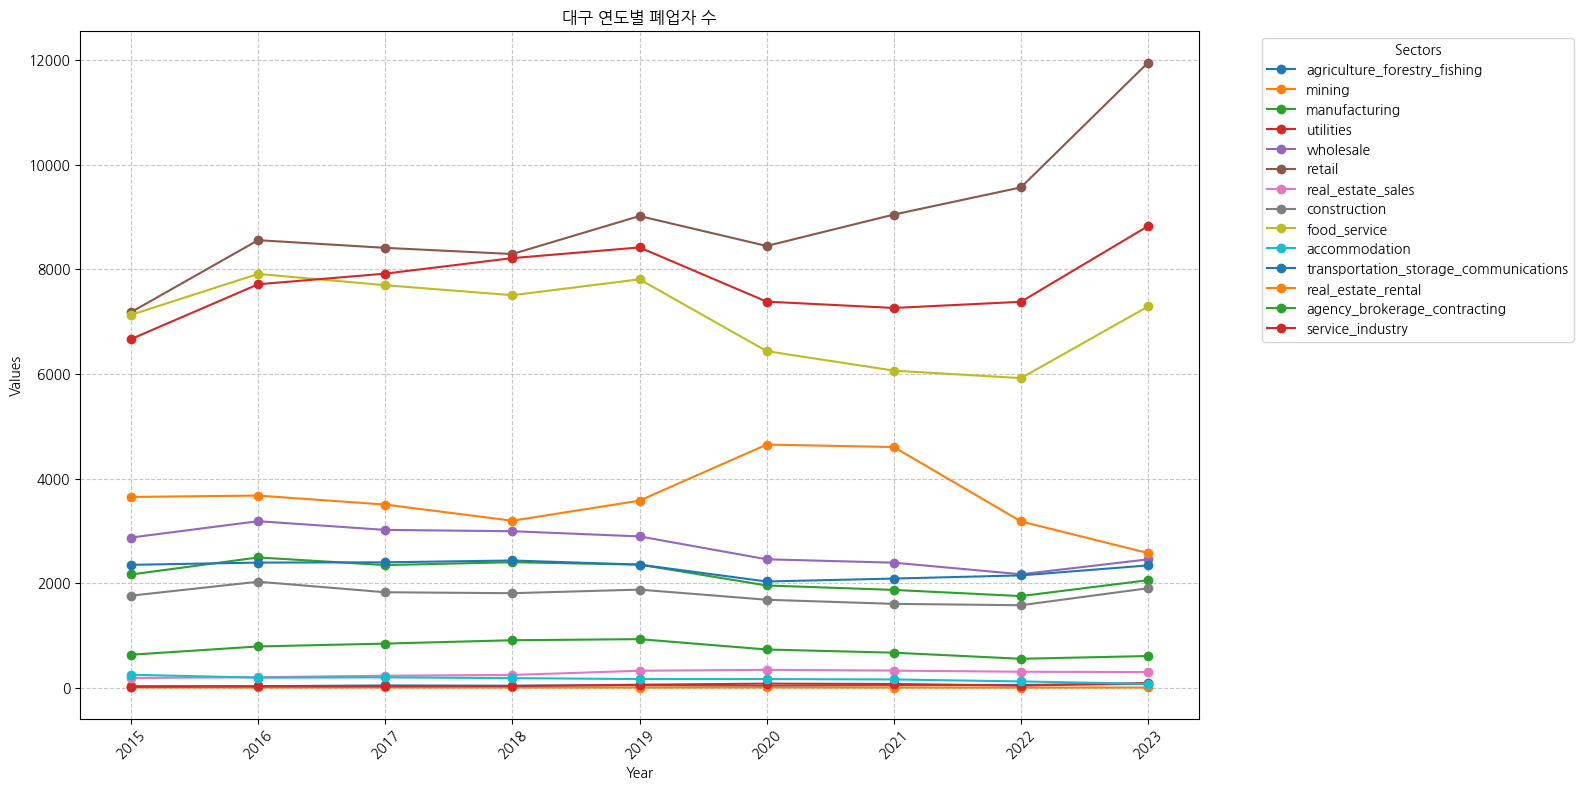

In [20]:
# 대구 연도별 폐업자
plt.figure(figsize=(16, 8))
for column in dagudf.columns[1:]:  
    plt.plot(dagudf['year'], dagudf[column], marker='o', label=column)


plt.title('대구 연도별 폐업자 수')
plt.xlabel('Year')
plt.ylabel('Values')
plt.xticks(dagudf['year'], rotation=45)
plt.grid(linestyle='--', alpha=0.7)
plt.legend(title="Sectors", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

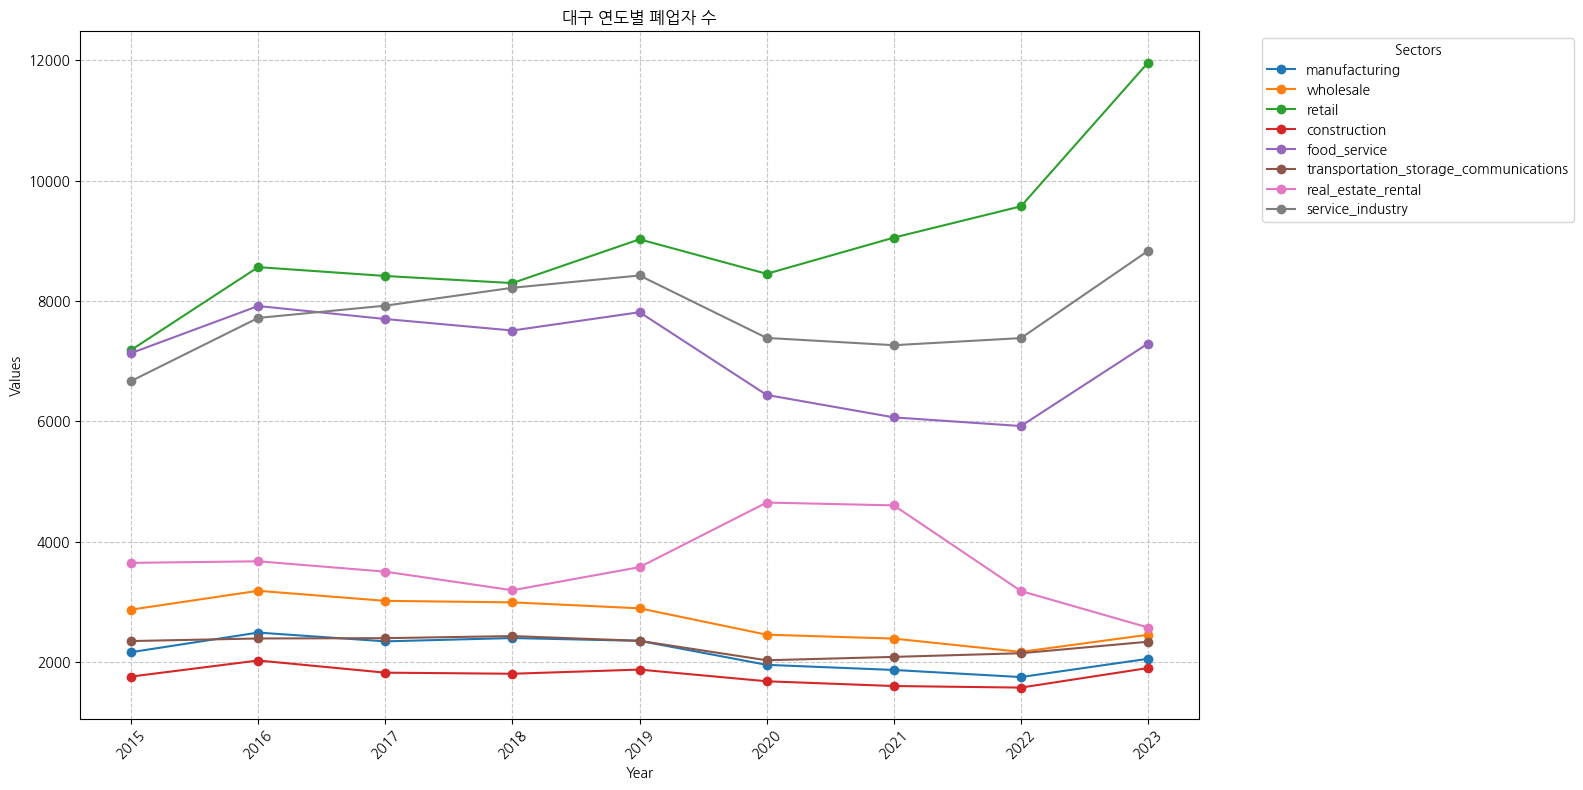

In [21]:
#대구 연도별 폐업자 작은 값 삭제
filtered_columns = [col for col in dagudf.columns[1:] if dagudf[col].max() > 1000]


plt.figure(figsize=(16, 8))
for column in filtered_columns:
    plt.plot(dagudf['year'], dagudf[column], marker='o', label=column)


plt.title('대구 연도별 폐업자 수')
plt.xlabel('Year')
plt.ylabel('Values')
plt.xticks(dagudf['year'], rotation=45)
plt.grid(linestyle='--', alpha=0.7)
plt.legend(title="Sectors", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

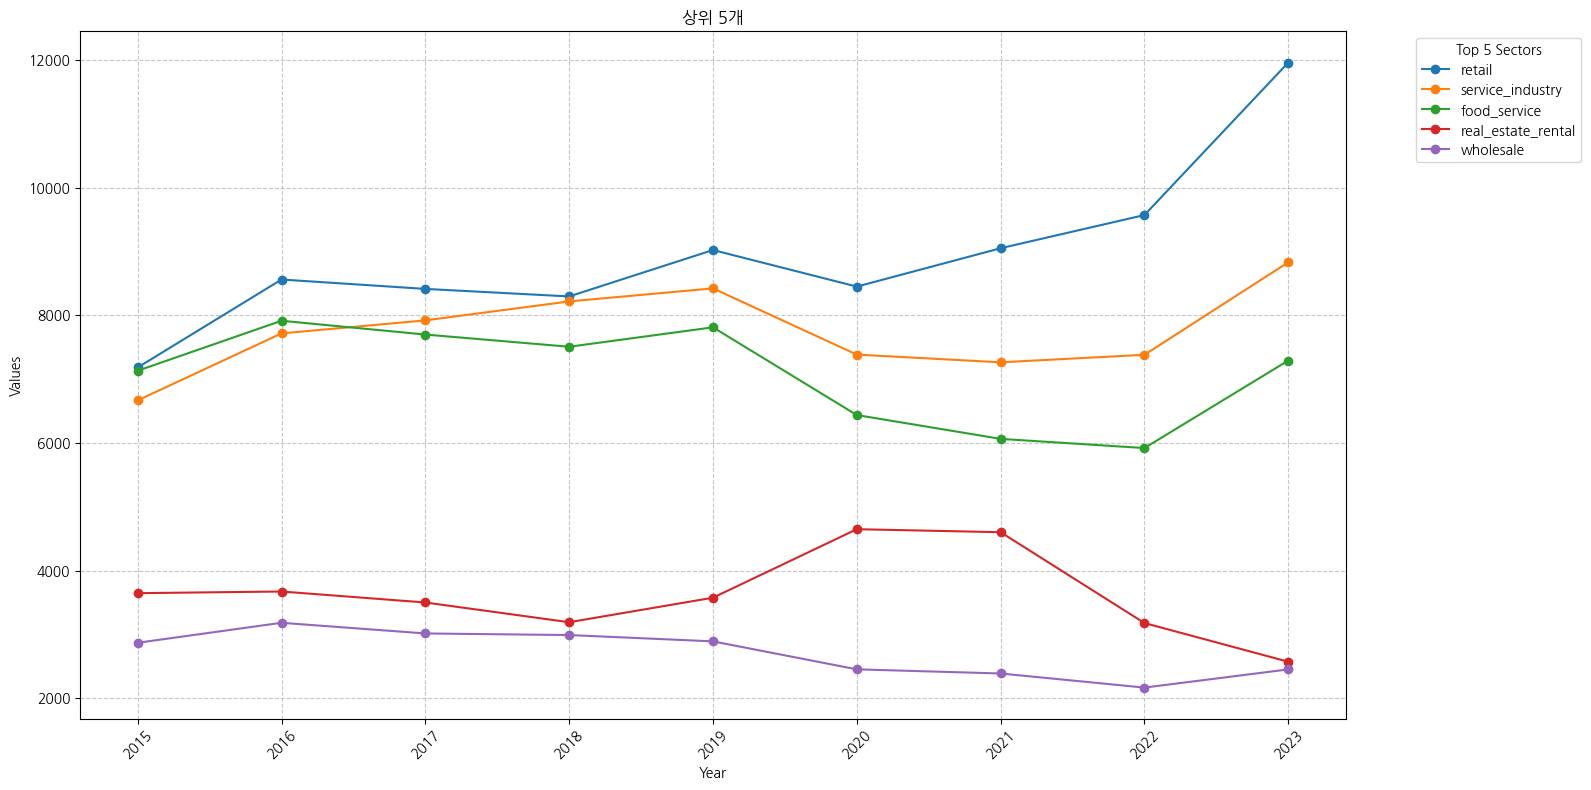

In [22]:
#상위 5개 폐업자수
top5col = dagudf.set_index('year').max().nlargest(5).index.tolist()


plt.figure(figsize=(16, 8))
for column in top5col:
    plt.plot(dagudf['year'], dagudf[column], marker='o', label=column)


plt.title('상위 5개')
plt.xlabel('Year')
plt.ylabel('Values')
plt.xticks(dagudf['year'], rotation=45)
plt.grid(linestyle='--', alpha=0.7)
plt.legend(title="Top 5 Sectors", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

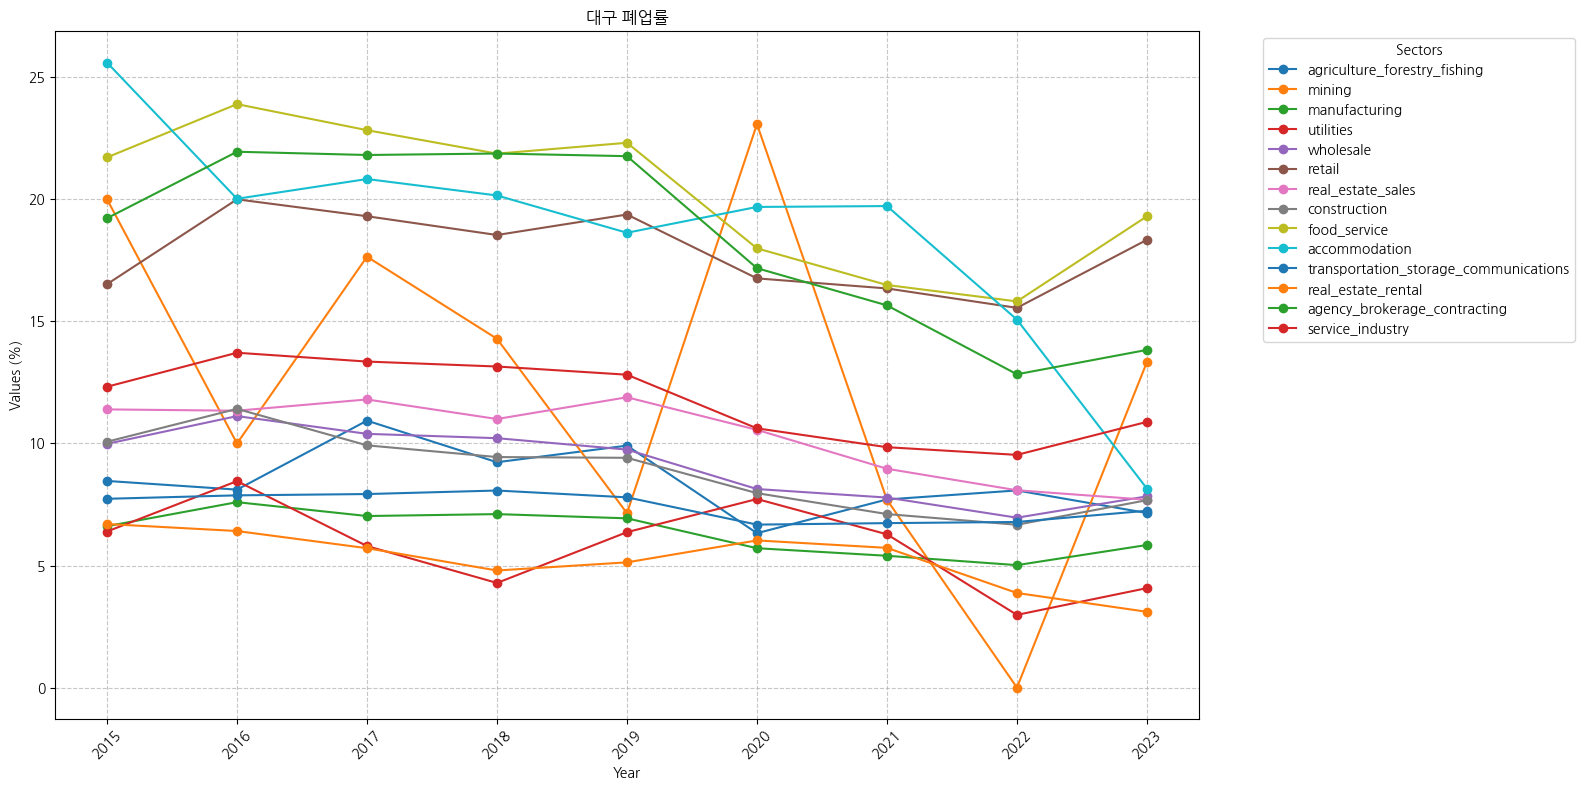

In [23]:
#대구 폐업률
daguediv["year"] = list(range(2015, 2015 + len(daguediv)))

plt.figure(figsize=(16, 8))
for column in daguediv.columns[1:]: 
    plt.plot(daguediv['year'], daguediv[column], marker='o', label=column)

plt.title('대구 폐업률')
plt.xlabel('Year')
plt.ylabel('Values (%)')
plt.xticks(daguediv['year'], rotation=45)
plt.grid(linestyle='--', alpha=0.7)
plt.legend(title="Sectors", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

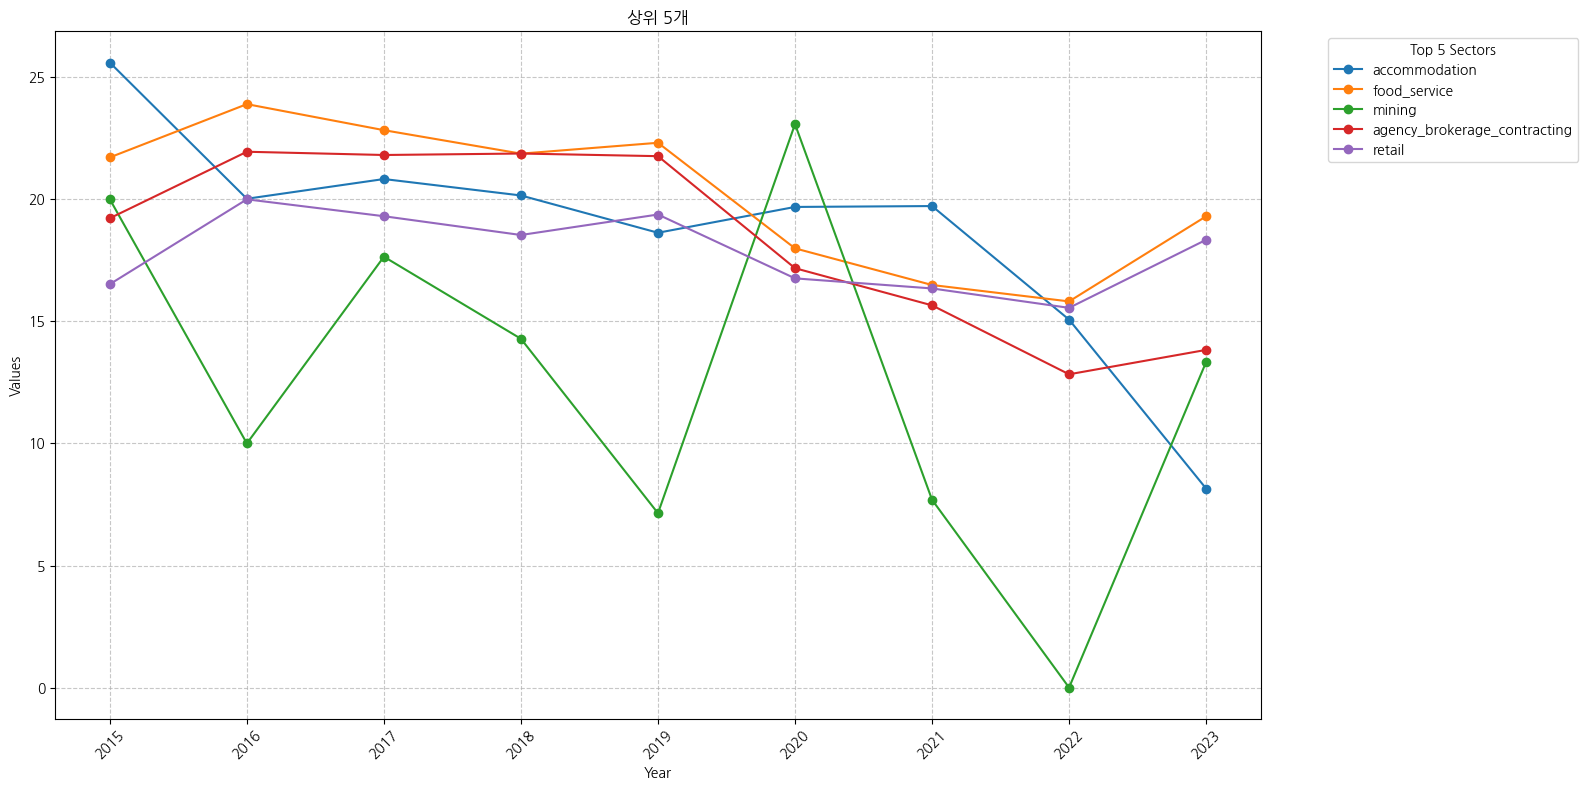

In [24]:
#전체에서 높았던거 5개
top5col = daguediv.set_index('year').max().nlargest(5).index.tolist()
plt.figure(figsize=(16, 8))
for column in top5col:
    plt.plot(daguediv['year'], daguediv[column], marker='o', label=column)


plt.title('상위 5개')
plt.xlabel('Year')
plt.ylabel('Values')
plt.xticks(daguediv['year'], rotation=45)
plt.grid(linestyle='--', alpha=0.7)
plt.legend(title="Top 5 Sectors", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

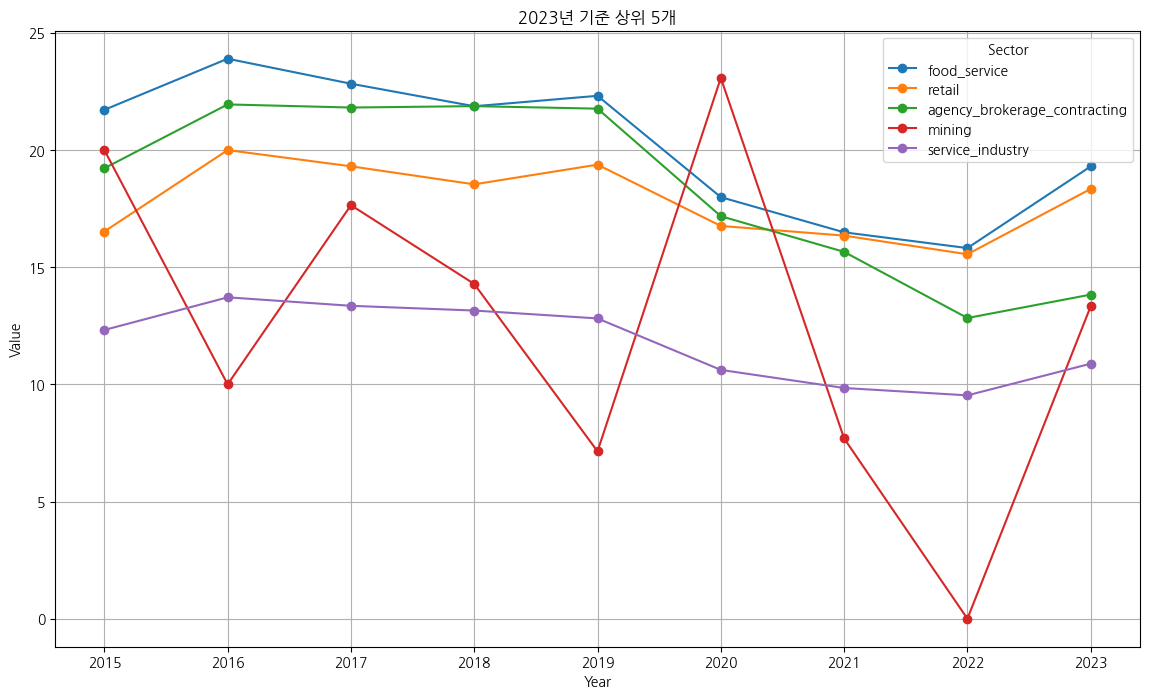

In [25]:
#2023년 기준 폐업률 상위 5개
data_2023 = daguediv[daguediv['year'] == 2023].iloc[0]


sector_names_2023 = data_2023.index[1:]
sector_values_2023 = data_2023.values[1:]


sector_df_2023 = pd.DataFrame({
    'sector': sector_names_2023,
    'value': sector_values_2023
}).sort_values(by='value', ascending=False)


top_5_sectors_2023 = sector_df_2023.head(5)['sector'].values


top_5_data = daguediv[['year'] + list(top_5_sectors_2023)]


plt.figure(figsize=(14, 8))

for sector in top_5_sectors_2023:
    plt.plot(top_5_data['year'], top_5_data[sector], marker='o', label=sector)

plt.title('2023년 기준 상위 5개')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(title='Sector')
plt.grid()
plt.show()

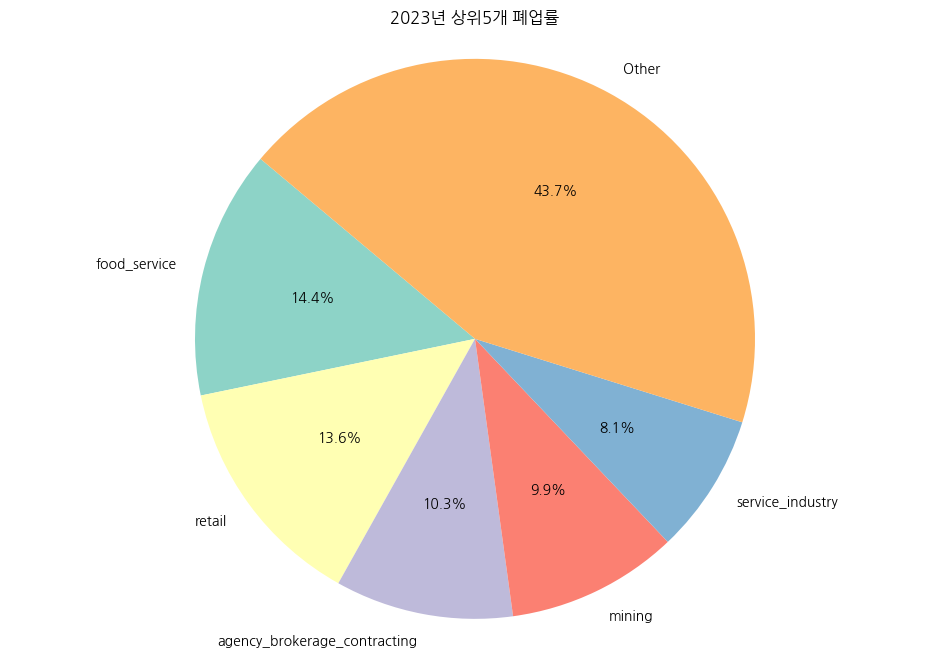

In [26]:
#파이차트 2023년 기준 상위 5개 나머지 기타
data2023 = daguediv[daguediv['year'] == 2023].iloc[0]


sector_names = data2023.index[1:]
sector_values = data2023.values[1:]


sector_df = pd.DataFrame({
    'sector': sector_names,
    'value': sector_values
}).sort_values(by='value', ascending=False)


top_5_sectors = sector_df.head(5)
other_value = sector_df['value'].iloc[5:].sum()

pie_chart_data = pd.concat([top_5_sectors, pd.DataFrame({'sector': ['Other'], 'value': [other_value]})])


plt.figure(figsize=(12, 8))
colors = plt.cm.Set3.colors 

plt.pie(
    pie_chart_data['value'],
    labels=pie_chart_data['sector'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)

plt.title('2023년 상위5개 폐업률')
plt.axis('equal')  
plt.show()